<a href="https://colab.research.google.com/github/whrui720/MDST/blob/main/MDST_checkpoint1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Checkpoint 1

Reminder:

- You are being evaluated for completion and effort in this checkpoint.
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suppress Pandas SettingWithCopyWarning
pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [7]:
# Load data
df = pd.read_csv('https://raw.githubusercontent.com/MichiganDataScienceTeam/2023-Tutorials/main/data/states_edu.csv')

# Display head of data, defaults to 5
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [21]:
# let's rename our columns to make them more intuitive
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
#inplace return copy of dataframe

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

In [8]:
# Grade 4 Math

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *Grade 4 Math*

How many years of data are logged in our dataset?

In [9]:
years_of_data = df["YEAR"].nunique()

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [49]:
# Comparing Michigan to Ohio with their averages
miavg = df[df["STATE"] == "MICHIGAN"]["AVG_MATH_4_SCORE"].mean()
oavg = df[df["STATE"] == "OHIO"]["AVG_MATH_4_SCORE"].mean()
higher_avg_state = "Michigan" if miavg > oavg else "Ohio"
print(higher_avg_state)

Ohio


Find the average for your chosen test across all states in 2019

In [12]:
avg_2019 = df[df["YEAR"] == 2019]["AVG_MATH_4_SCORE"].mean()
print(avg_2019)

239.9433962264151


For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [14]:
max = df.groupby("STATE")["AVG_MATH_4_SCORE"].max()

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable.

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [16]:
# Create a new feature: expenditure_per_student
df["expenditure_per_student"] = df["INSTRUCTION_EXPENDITURE"]/df["ENROLL"]

Feature engineering justification: Perhaps a state's instruction expenditure per student has an affect on their overall academic performance, so I created an instruction_expenditure_per_student feature.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

In [ ]:
df.AVG_MATH_4_SCORE.plot.hist(title="Distribution of 8th Grade Reading Scores", edgecolor="black")

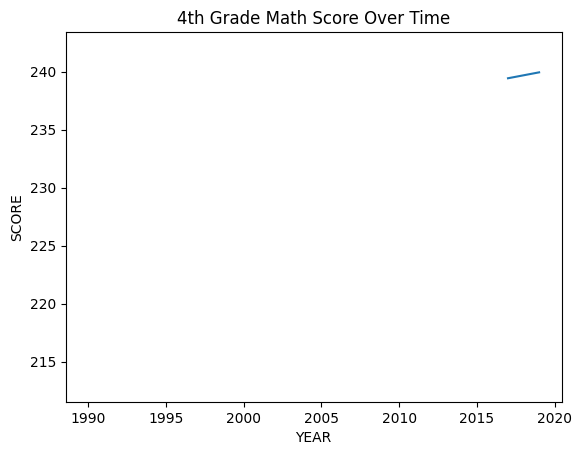

In [22]:
df.groupby('YEAR')["AVG_MATH_4_SCORE"].mean().plot()
plt.ylabel('SCORE')
plt.title('4th Grade Math Score Over Time')
plt.show()

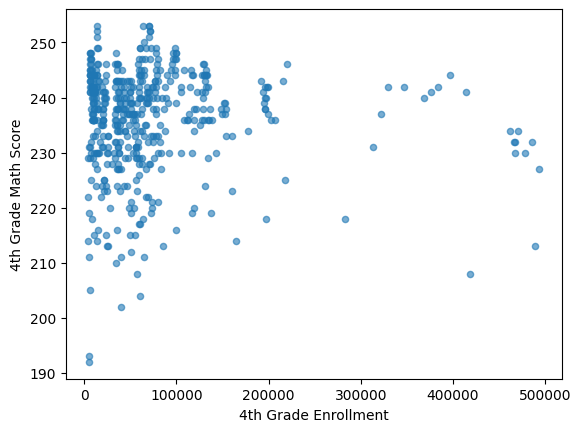

In [23]:
df.plot.scatter(x='ENROLL_4', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('4th Grade Enrollment')
plt.ylabel('4th Grade Math Score')
plt.show()

Text(0, 0.5, '4th Grade Math Score')

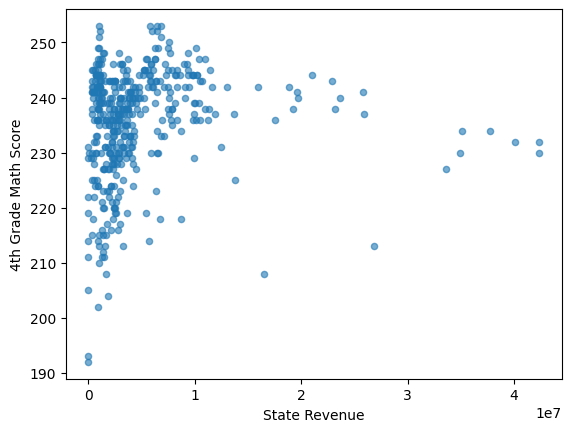

In [24]:
df.plot.scatter(x='STATE_REVENUE', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('State Revenue')
plt.ylabel('4th Grade Math Score')

Text(0, 0.5, '4th Grade Math Score')

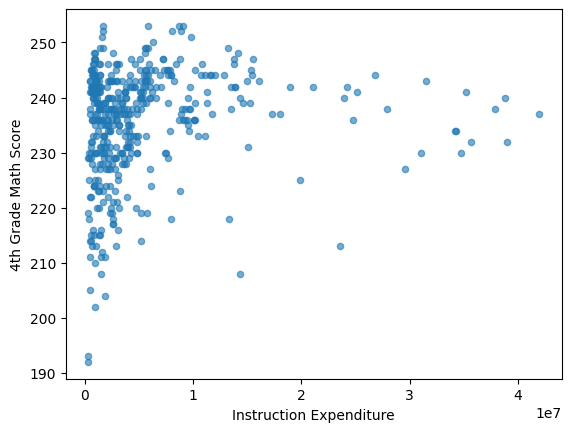

In [25]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('Instruction Expenditure')
plt.ylabel('4th Grade Math Score')

<Axes: xlabel='AVG_MATH_4_SCORE', ylabel='AVG_MATH_8_SCORE'>

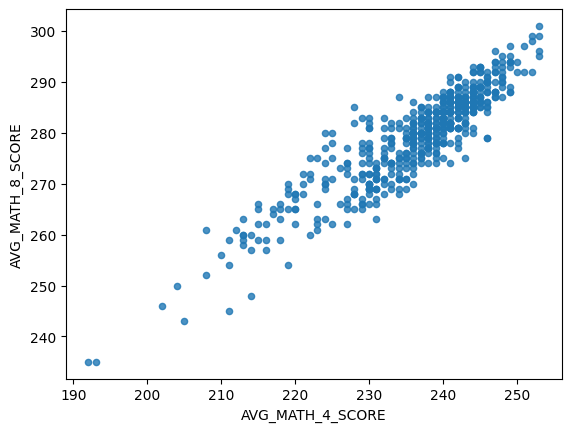

In [26]:
df.plot.scatter(x='AVG_MATH_4_SCORE', y='AVG_MATH_8_SCORE', alpha=0.8)

**Relationship between Grade 4 and Grade 8 Math Scores**

**Visualization 2**

<Axes: xlabel='AVG_MATH_4_SCORE', ylabel='AVG_READING_4_SCORE'>

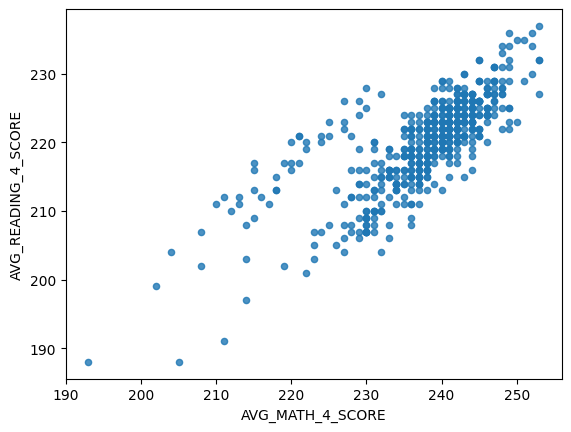

In [28]:
df.plot.scatter(x='AVG_MATH_4_SCORE', y='AVG_READING_4_SCORE', alpha=0.8)

**Relationship between Math and Reading Scores at Grade 4**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = df[['ENROLL_4','INSTRUCTION_EXPENDITURE','AVG_READING_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']

In [31]:
y.fillna(y.median(), inplace=True)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
model = LinearRegression()

In [36]:
model.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [44]:
# R^2 value describes how well a linear model fits the data
# It ranges between 0 and 1
# There are many caveats to R^2 but it is a good starting point
model.score(X_test, y_test)

0.4085647838751514

In [45]:
# mean error
np.mean(model.predict(X_test)-y_test)

-0.32862210368858263

We have copied over the graphs that visualize the model's performance on the training and testing set.

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

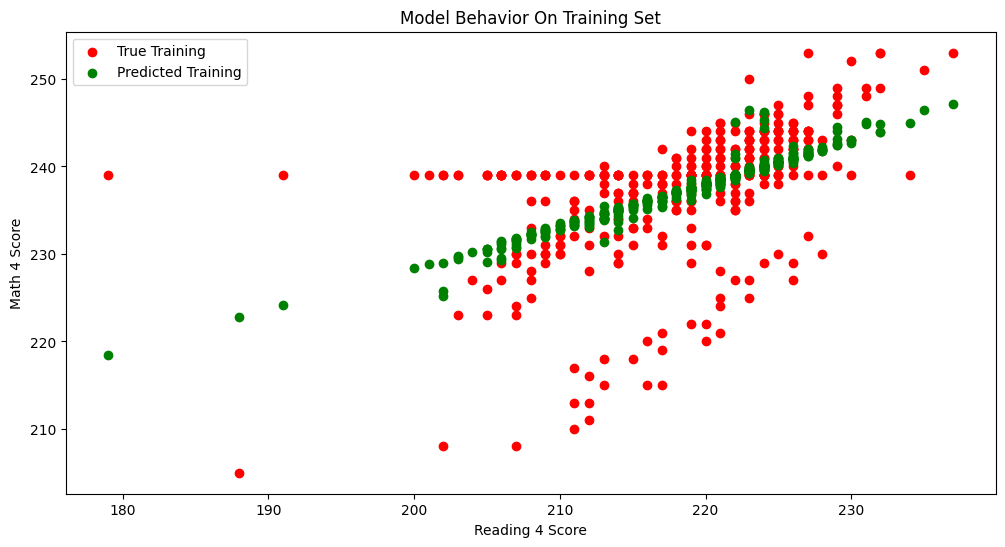

In [46]:
col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train["AVG_READING_4_SCORE"], y_train, color = "red")
plt.scatter(X_train["AVG_READING_4_SCORE"], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel("Reading 4 Score")
plt.ylabel("Math 4 Score")
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

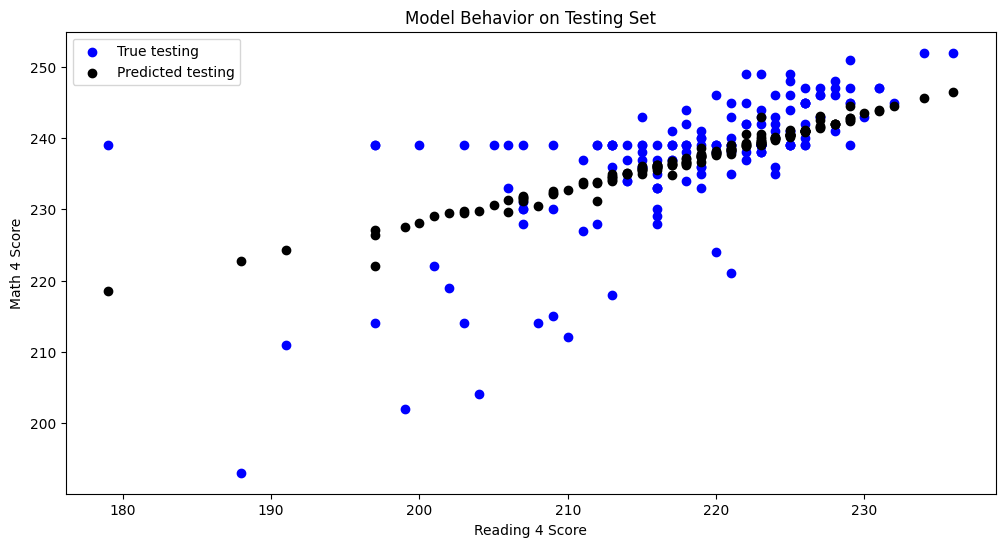

In [47]:
col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test["AVG_READING_4_SCORE"], y_test, color = "blue")
plt.scatter(X_test["AVG_READING_4_SCORE"], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel("Reading 4 Score")
plt.ylabel('Math 4 Score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**SUMMARY:**
In general, it seems that kids that do better on reading do better on math as well in grade 4, which lends to the general idea of 'smarter' kids being better at both. In fact, the model predicts almost a 1-1 point ratio for math to reading. However, real data suggests that this correlation becomes stronger for higher scorers, and that an increase in reading score actually corresponds with a larger increase in math.
The spread of the predicted data is far narrower than the actual data on both the training and testing set, which is to be expected, but it seems particularly bad at predicting extrapolated points and doesn't really account for the while outliers (which may honestly be a good thing).